         Date       Close
0  2014-10-01  383.614990
1  2014-10-02  375.071991
2  2014-10-03  359.511993
3  2014-10-04  328.865997
4  2014-10-05  320.510010


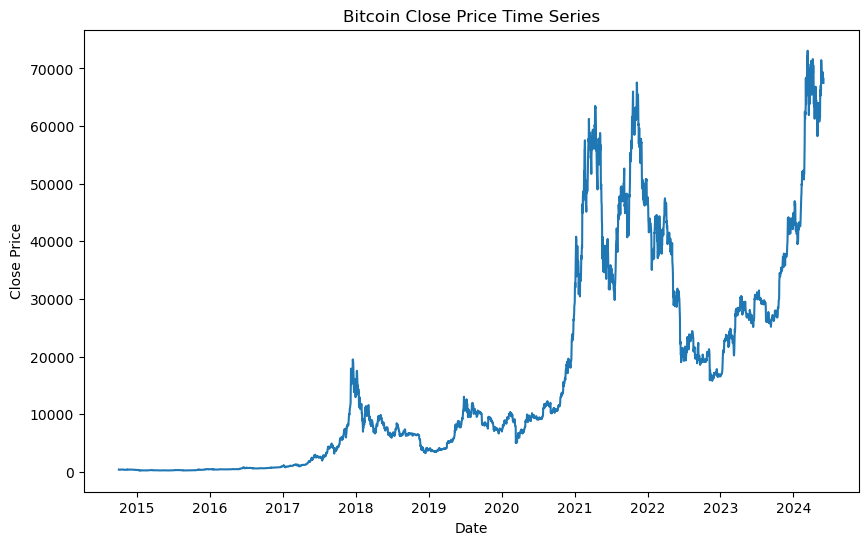

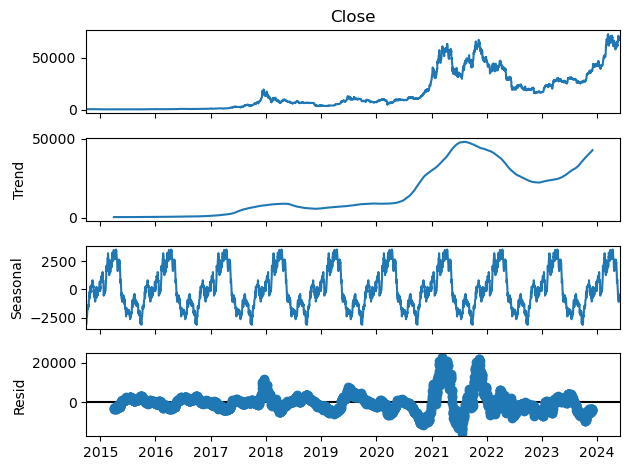


Seasonal Component:
 Date
2014-10-01   -3028.389654
2014-10-02   -2809.090758
2014-10-03   -2266.581668
2014-10-04   -2448.557607
2014-10-05   -2371.444855
2014-10-06   -2145.422430
2014-10-07   -1965.271646
2014-10-08   -1506.432484
2014-10-09   -1711.510149
2014-10-10   -1647.874319
2014-10-11   -1583.437115
2014-10-12   -1714.581158
2014-10-13   -1419.761345
2014-10-14   -1561.445152
2014-10-15   -1380.639707
Name: seasonal, dtype: float64

Seasonal Component Standard Deviation: 1730.482716240647
The data shows seasonality.


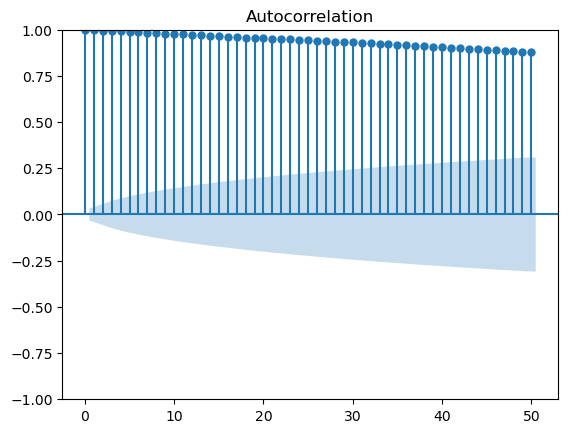

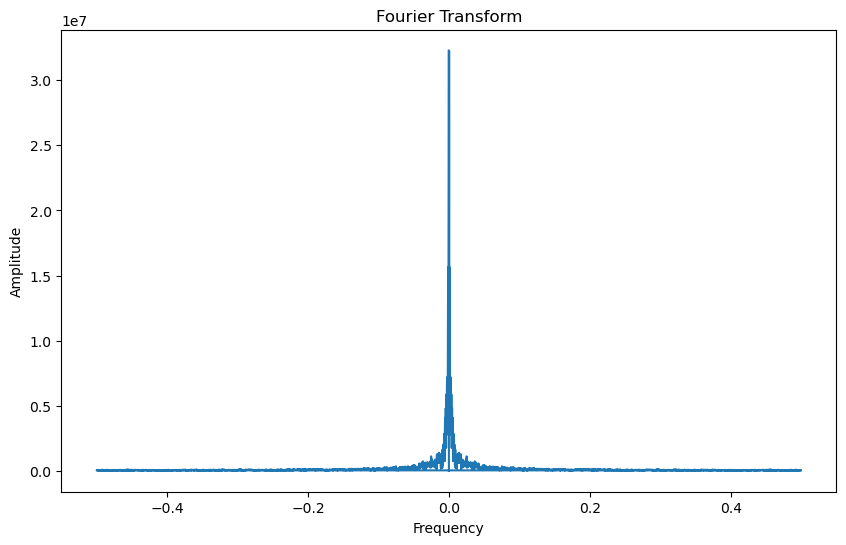

The data shows significant periodic components, indicating seasonality.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from scipy.fftpack import fft

# Load the Bitcoin data
Bitcoin_df = pd.read_csv('BTC-USD.csv', usecols=['Date', 'Close'])

# Print the first five rows
print(Bitcoin_df.head())

# Ensure the 'Date' column is in datetime format and set as the index
Bitcoin_df['Date'] = pd.to_datetime(Bitcoin_df['Date'])
Bitcoin_df.set_index('Date', inplace=True)

# Extract the time series data
ts = Bitcoin_df['Close']

# Plotting the Time Series
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Bitcoin Close Price Time Series')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Decomposition
decomposition = seasonal_decompose(ts, model='additive', period=365)  # Assuming yearly seasonality

# Plotting the decomposition
decomposition.plot()
plt.show()

# Check the seasonal component
seasonal_component = decomposition.seasonal
print("\nSeasonal Component:\n", seasonal_component.head(15))  # Print first 15 values of the seasonal component

# Check if the seasonal component has significant variation
seasonal_std = seasonal_component.std()
print(f"\nSeasonal Component Standard Deviation: {seasonal_std}")

if seasonal_std > 0:
    print("The data shows seasonality.")
else:
    print("The data does not show significant seasonality.")

# Autocorrelation Function (ACF) Plot
plot_acf(ts, lags=50)
plt.show()

# Fourier Transform
# Remove the mean to focus on the periodic components
ts_centered = ts - ts.mean()

# Ensure the data is a numpy array
ts_centered_np = ts_centered.values

# Perform the Fourier Transform
fft_vals = fft(ts_centered_np)
fft_freqs = np.fft.fftfreq(len(fft_vals))

# Plotting the FFT
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs, np.abs(fft_vals))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Check for significant frequencies in the FFT
significant_freqs = np.abs(fft_vals) > 0.05 * np.max(np.abs(fft_vals))
if np.any(significant_freqs):
    print("The data shows significant periodic components, indicating seasonality.")
else:
    print("The data does not show significant periodic components.")
